In [117]:
# importing libraries
import pandas            as pd                       # data science essentials
import numpy as np # data science essentials
# random number generation
import random as rand 
import gender_guesser.detector as gender # guess gender based on (given) name
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


In [118]:
# Reading the file from excel

GOT = pd.read_excel('./GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# displaying the head of the dataset
GOT.head(n = 15)


,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [119]:
# Getting the data's information or summary

GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [120]:
# Converting the object dtype to a string

data_types = {"name"     : str,
              "title" : str,
              "culture"   : str,
              "mother" : str,
              "father" : str,
              "heir" : str,
              "house" : str,
              "spouse" : str}

In [121]:
# Checking the data for missing values
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

Handling Missing Values - 1

In [122]:
# Creating missing value flags

def mv_flagger(df):
    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

# text_split_feature
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [123]:
# pulling up data dictionary
GOT_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
GOT_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [124]:
# Setup a gender guesser

%pip install gender_guesser

Note: you may need to restart the kernel to use updated packages.


In [125]:
 #setting random seed
 
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying path and file name and reading the file into Python
GOT = pd.read_excel('./GOT_character_predictions.xlsx') 

# checking the first 10 rows of the dataset
GOT.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [126]:
# Creating a new column for first name 

# new data frame with split value columns
GOT_new = GOT["name"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
GOT["First Name"]= GOT_new[0]
  
# making separate last name column from new data frame
GOT["Last Name"]= GOT_new[1]
  
# Dropping the Last Name column...
GOT.drop(columns='Last Name', inplace = True)
  
# GOT display
GOT.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,First Name
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1,Tommen
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,Valarr
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0,Viserys
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0,Wilbert
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1,Wilbert


In [127]:
# guessing gender based on (given) name

# placeholder list
#names_list = []


# looping to guess gender
#for name in GOT['First Name']:
#    guess = gender.Detector().get_gender(name)
#    print(guess)
#    names_list.append(guess)


# converting list into a series
#GOT['gender'] = pd.Series(names_list)


# checking results
#GOT.head(n = 5)

In [128]:
GOT['gender'] = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 
                 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 
                 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown',
                 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 
                 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male',
                 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 
                 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown',
                 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown',
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 
                 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 
                 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 
                 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown',
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 
                 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 
                 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 
                 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 
                 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 
                 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 
                 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 
                 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 
                 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 
                 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 
                  'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 
                 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 
                 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 
                 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 
                 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 
                 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 
                 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 
                 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 
                 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 
                 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 
                 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 
                 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [129]:
# running the mv_flagger function
GOT = mv_flagger(GOT)


# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'First Name', 'gender', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [130]:
# Checking for missing values

GOT.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
First Name                       0
gender                           0
m_title                          0
m_culture           

In [131]:
# Checking the mode, mean or median of categorical variables with NaNs

# mode, mean and median of a specific column
print(f'''
Title
---------------------------------------------------      
{GOT.loc[:,"title"].mode()}

Culture
---------------------------------------------------
{GOT.loc[:,"culture"].mode()}

Date of Birth
---------------------------------------------------
{GOT.loc[:,"dateOfBirth"].median()}

House of Character
----------------------------------------------------
{GOT.loc[:,"house"].mode()}

IF Mother is Alive
----------------------------------------------------
{GOT.loc[:,"isAliveMother"].median()}

If Father is Alive
----------------------------------------------------
{GOT.loc[:,"isAliveFather"].median()}

If Heir is Alive
-------------------------------------------------
{GOT.loc[:,"isAliveHeir"].median()}

If Spouse is Alive
--------------------------------------------------
{GOT.loc[:,"isAliveSpouse"].median()}

If Character is Married
---------------------------------------------------
{GOT.loc[:,"isMarried"].median()}

If Character is Noble
--------------------------------------------------
{GOT.loc[:,"isNoble"].median()}

Age of Character
--------------------------------------------------
{GOT.loc[:,"age"].median()}

''')



Title
---------------------------------------------------      
0    Ser
dtype: object

Culture
---------------------------------------------------
0    Northmen
dtype: object

Date of Birth
---------------------------------------------------
268.0

House of Character
----------------------------------------------------
0    Night's Watch
dtype: object

IF Mother is Alive
----------------------------------------------------
1.0

If Father is Alive
----------------------------------------------------
0.0

If Heir is Alive
-------------------------------------------------
1.0

If Spouse is Alive
--------------------------------------------------
1.0

If Character is Married
---------------------------------------------------
0.0

If Character is Noble
--------------------------------------------------
0.0

Age of Character
--------------------------------------------------
27.0




In [132]:
# instantiating an imputation value

# imputing 'dateOfBirth'
dateOfBirth_median = GOT['dateOfBirth'].median()

GOT['dateOfBirth'].fillna(value = dateOfBirth_median,
                         inplace = True)

# imputing 'age'
age_mean = GOT['age'].median()

GOT['age'].fillna(value = age_mean,
                         inplace = True)

# imputing 'isAliveMother'
isAliveMother_median = GOT['isAliveMother'].median()

GOT['isAliveMother'].fillna(value = isAliveMother_median,
                            inplace = True)

# imputing 'isAliveFather'
isAliveFather_median = GOT['isAliveFather'].median()

GOT['isAliveFather'].fillna(value = isAliveFather_median,
                            inplace = True)

# imputing 'isAliveHeir'
isAliveHeir_median = GOT['isAliveHeir'].median()

GOT['isAliveHeir'].fillna(value = isAliveHeir_median,
                            inplace = True)

# imputing 'isAliveSpouse'
isAliveSpouse_median = GOT['isAliveSpouse'].median()

GOT['isAliveSpouse'].fillna(value = isAliveSpouse_median,
                            inplace = True)



In [133]:
# Merging age and dateOfBirth columns

GOT['sum_age_dob'] = GOT['age'] + GOT['dateOfBirth']

GOT.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,First Name,gender,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,sum_age_dob
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,Viserys,unknown,1,1,1,0,0,0,1,1,0,0,0,1,1,295.0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,Addison,andy,0,1,1,1,1,1,0,1,1,1,1,1,1,295.0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,0,1,0,1,1,1,0,0,1,1,1,0,0,105.0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,Sylva,female,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0


Handling Missing Values - 2

In [134]:
# Printing the first ten highest values of title and culture

print(f"""
Title Value count
---------------------------------------------------------------      
{GOT['age'].value_counts().sort_values(ascending=False)}

Culture Value count
--------------------------------------------------------------
{GOT['culture'].value_counts().sort_values(ascending=False).head(10)}      
      """)


Title Value count
---------------------------------------------------------------      
 27.0        1519
 100.0         29
 19.0          19
 22.0          16
 21.0          15
 23.0          14
 18.0          14
 20.0          14
 15.0          13
 16.0          13
 24.0          10
 12.0           9
 45.0           9
 17.0           9
 56.0           8
 9.0            8
 13.0           8
 28.0           7
 39.0           7
 10.0           7
 11.0           7
 14.0           7
 41.0           7
 42.0           7
 25.0           6
 26.0           6
 32.0           6
 35.0           6
 6.0            6
 38.0           5
 60.0           5
 37.0           5
 36.0           5
 49.0           5
 66.0           4
 31.0           4
 48.0           4
 50.0           4
 34.0           4
 54.0           4
 29.0           4
 30.0           4
 69.0           4
 65.0           4
 68.0           4
 55.0           4
 46.0           4
 77.0           3
 43.0           3
 47.0           3
 52.0      

In [135]:
# Replacing NaN values in Mother with Not given
GOT["mother"].fillna("Not Given", inplace = True)

# Replacing NaN values in Father with unknown
GOT["father"].fillna("unknown", inplace = True)

# Replacing NaN values in heir with None
GOT["heir"].fillna("None", inplace = True)

# Replacing NaN values in house with unknown
GOT['house'].fillna("unknown", inplace = True)

# Replacing NaN values in spouse with unknown
GOT["spouse"].fillna("unknown", inplace = True)

# Replacing NaN values in spouse with unknown
GOT["title"].fillna("unknown", inplace = True)

# Replacing NaN values in spouse with unknown
GOT["culture"].fillna("unknown", inplace = True)


In [136]:
# Replacing the values for 'andy', 'mostly_male', and 'mostly_female'

GOT["gender"]= GOT["gender"].str.replace("andy", "male", case = False)
GOT["gender"]= GOT["gender"].str.replace("mostly_male", "male", case = False)
GOT["gender"]= GOT["gender"].str.replace("mostly_female", "female", case = False)

In [137]:
# Defining a function to create dummy variables for the most frequent variables in title and culture

def one_hot_ft(GOT, variable, ft_labels):

    for label in ft_labels:
        GOT[variable+'_'+label] = np.where(GOT[variable]==label, 1, 0)
# Making a list with the most frequent variables in culture
ft_dummy = [x for x in GOT.culture.value_counts().sort_values(ascending=False).head(4).index]

one_hot_ft(GOT, 'culture', ft_dummy)

In [138]:
# Making a list with the most frequent variables in title

ft_dummy = [x for x in GOT.title.value_counts().sort_values(ascending=False).head(6).index]

one_hot_ft(GOT, 'title', ft_dummy)

In [139]:
ft_dummy = [x for x in GOT.house.value_counts().sort_values(ascending=False).head(6).index]

one_hot_ft(GOT, 'house', ft_dummy)

In [140]:
ft_dummy = [x for x in GOT.gender.value_counts().sort_values(ascending=False).head(3).index]

one_hot_ft(GOT, 'gender', ft_dummy)

In [141]:
GOT.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,First Name,gender,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,sum_age_dob,culture_unknown,culture_Northmen,culture_Ironborn,culture_Free Folk,title_unknown,title_Ser,title_Maester,title_Archmaester,title_Lord,title_Septon,house_unknown,house_Night's Watch,house_House Frey,house_House Stark,house_House Targaryen,house_House Lannister,gender_unknown,gender_male,gender_female
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,Viserys,unknown,1,1,1,0,0,0,1,1,0,0,0,1,1,295.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,Not Given,unknown,None,House Frey,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,Addison Hill,Ser,unknown,268.0,Not Given,unknown,None,House Swyft,unknown,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,Addison,male,0,1,1,1,1,1,0,1,1,1,1,1,1,295.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Aemma Arryn,Queen,unknown,82.0,Not Given,unknown,None,House Arryn,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,0,1,0,1,1,1,0,0,1,1,1,0,0,105.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,Not Given,unknown,None,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,Sylva,female,0,0,0,1,1,1,0,0,1,1,1,0,0,305.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [142]:
GOT.isnull().any().any()

False

In [143]:
# Finding the correlation between the target variables and the features

# creating a (Pearson) correlation matrix
df_corr = GOT.corr(method = 'pearson').round(decimals = 2)


# printing (Pearson) correlations with isAlive
print(df_corr.loc['isAlive'].sort_values(ascending = False))

isAlive                       1.00
sum_age_dob                   0.31
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_father                      0.14
m_isAliveFather               0.14
m_mother                      0.14
m_isAliveMother               0.14
m_isAliveHeir                 0.13
m_heir                        0.13
isAliveHeir                   0.11
isAliveSpouse                 0.08
isAliveMother                 0.07
culture_Ironborn              0.07
title_Archmaester             0.06
house_House Frey              0.06
m_isAliveSpouse               0.05
title_Maester                 0.05
m_spouse                      0.05
gender_female                 0.05
age                           0.05
m_culture                     0.04
house_unknown                 0.04
m_title                       0.04
culture_unknown               0.04
title_unknown                 0.04
m_house                       0.04
book5_A_Dance_with_D

In [144]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [145]:
GOT.loc[ :, 'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [146]:
GOT['popularity'].value_counts(normalize=False).round(2)

0.013378    120
0.016722    113
0.006689    103
0.010033    101
0.000000     86
0.023411     82
0.020067     79
0.003344     77
0.026756     68
0.043478     45
0.030100     44
0.033445     41
0.036789     35
0.050167     35
0.040134     34
0.046823     31
0.063545     28
0.060201     25
0.053512     23
0.056856     22
0.076923     22
0.070234     21
0.073579     21
0.086957     21
1.000000     21
0.066890     20
0.080268     19
0.083612     17
0.103679     17
0.140468     16
0.130435     14
0.127090     14
0.013378     14
0.137124     13
0.090301     12
0.107023     12
0.020067     11
0.016722     11
0.133779     10
0.120401     10
0.143813     10
0.003344     10
0.006689     10
0.093645      9
0.160535      9
0.010033      8
0.096990      8
0.100334      8
0.167224      7
0.026756      7
0.046823      7
0.147157      7
0.123746      7
0.153846      7
0.113712      6
0.163880      6
0.170569      6
0.023411      6
0.110368      6
0.117057      6
0.244147      5
0.230769      5
0.043478

In [147]:
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'First Name', 'gender', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'sum_age_dob', 'culture_unknown', 'culture_Northmen', 'culture_Ironborn', 'culture_Free Folk', 'title_unknown', 'title_Ser', 'title_Maester', 'title_Archmaester', 'title_Lord', 'title_Septon', 'house_unknown', 'house_Night's Watch', 'house_House Frey', 'house_House Stark', 'house_House Targaryen', 'house_House Lannister', 'gender_unknown', 'gender_male', 'gender_female'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4> Preparing Explanatory and Response Data</h4>
Declare the explanatory variables as <strong>GOT_data</strong> and the response variable (isAlive) as <strong>GOT_response</strong>. The presence of the 'S.No' column could affect our model negatively because it has nothing to do with our model and it predictions. Knowing this, we'll drop that column and proceed to declaring our explanatory variables.

In [148]:
GOT_data = GOT.drop(['S.No', 'gender_unknown', 'name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'First Name', 'gender'], axis = 1, inplace = True)

In [149]:
#  declaring explanatory variables

GOT_data = GOT.drop('isAlive', axis = 1)

# declaring response variable
GOT_target = GOT.loc[ :, 'isAlive']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4> Preparing train-test split for statsmodels.</h4>



In [150]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [151]:
# Printing the value counts for the training and testing sets of the response variable

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Building a univariant Logistic Regression model.</h4><br>
<p>In the cell below, we'll be building a logistic regression model with the explanatory variable that has the highest correlation with the response variable in <strong>statsmodels</strong> </p>


In [152]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ sum_age_dob""",
                           data = GOT_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.498397
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.121     
Dependent Variable: isAlive          AIC:              1749.3875 
Date:               2021-12-05 22:53 BIC:              1760.3233 
No. Observations:   1751             Log-Likelihood:   -872.69   
Df Model:           1                LL-Null:          -992.53   
Df Residuals:       1749             LLR p-value:      4.6169e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      -44.1725   6.0544 -7.2960 0.0000 -56.0389 -32.3062
sum_age_dob      0.1534   0.0205  7.4876 0.0000   0.1133   0.1936
=================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Putting all the explanatory variables in the logistic regression model.</h4>


In [153]:
for val in GOT_data:
    print(f" {val} + ")

 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 sum_age_dob + 
 culture_unknown + 
 culture_Northmen + 
 culture_Ironborn + 
 culture_Free Folk + 
 title_unknown + 
 title_Ser + 
 title_Maester + 
 title_Archmaester + 
 title_Lord + 
 title_Septon + 
 house_unknown + 
 house_Night's Watch + 
 house_House Frey + 
 house_House Stark + 
 house_House Targaryen + 
 house_House Lannister + 
 gender_male + 
 gender_female + 


In [154]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ sum_age_dob +
                                    book1_A_Game_Of_Thrones + 
                                    book2_A_Clash_Of_Kings + 
                                    book3_A_Storm_Of_Swords + 
                                    book4_A_Feast_For_Crows + 
                                    book5_A_Dance_with_Dragons +
                                    isAliveMother + 
                                    isAliveFather +
                                    isAliveSpouse + 
                                    isMarried + 
                                    isNoble + 
                                    age + 
                                    numDeadRelations +
                                    m_heir + 
                                    m_isAliveFather +
                                    culture_Northmen + 
                                    culture_Ironborn + 
                                    title_Ser + 
                                    title_Maester + 
                                    title_Lord + 
                                    title_Septon + 
                                    popularity +
                                    gender_male + 
                                    gender_female """,
                                data = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.430692
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.240     
Dependent Variable:     isAlive              AIC:                  1558.2838 
Date:                   2021-12-05 22:53     BIC:                  1694.9823 
No. Observations:       1751                 Log-Likelihood:       -754.14   
Df Model:               24                   LL-Null:              -992.53   
Df Residuals:           1726                 LLR p-value:          1.0892e-85
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -62.1056   8.1341 -7.6352 0.0000 -78.0481 -46.1630
sum_age_dob                  0.2107   0.0278  7.5868 0.0000   0.1563   0.2652
book1_A_Game_Of_Thrones     -0.6184   0.1676 -3.6898 0.0002  -0.9468  -0.2899
book2_A_Clash_Of_Kings      -0.6909   0.1502 -4.5997 0.0000  -0.9853  -0.3965
book3_A_Storm_Of_Swords     -0.5128   0.1568 -3.2709 0.0011  -0.8201  -0.2055
book4_A_Feast_For_Crows      1.3769   0.1650  8.3445 0.0000   1.0535   1.7003
book5_A_Dance_with_Dragons  -0.1651   0.1546 -1.0674 0.2858  -0.4681   0.1380
isAliveMother               -0.4470   1.3915 -0.3212 0.7480  -3.1743   2.2803
isAliveFather                0.8713   1.3128  0.6637 0.5069  -1.7018   3.4445
isAliveSpouse                0.3631   0.4798  0.7567 0.4492  -0.5773   1.3034
isMarried                    0.2367   0.2432  0.9731 0.3305  -0.2400   0.7134
isNoble                      0.2677   0.1778  1.5058 0.1321  -0.0808   0.6162
age                          0.0000   0.0001  0.2840 0.7764  -0.0002   0.0002
numDeadRelations            -0.0650   0.0648 -1.0043 0.3152  -0.1919   0.0619
m_heir                       0.4263   0.9309  0.4579 0.6470  -1.3983   2.2508
m_isAliveFather              0.8602   0.8517  1.0100 0.3125  -0.8090   2.5295
culture_Northmen             0.0689   0.2590  0.2661 0.7902  -0.4387   0.5766
culture_Ironborn             0.3080   0.3429  0.8981 0.3691  -0.3641   0.9800
title_Ser                   -0.3818   0.2072 -1.8428 0.0654  -0.7878   0.0243
title_Maester                0.4858   0.5677  0.8558 0.3921  -0.6269   1.5985
title_Lord                  -0.2900   0.6257 -0.4635 0.6430  -1.5164   0.9364
title_Septon                -0.1843   0.6643 -0.2774 0.7814  -1.4863   1.1177
popularity                  -2.1362   0.5935 -3.5993 0.0003  -3.2994  -0.9730
gender_male                 -0.2242   0.1600 -1.4014 0.1611  -0.5377   0.0893
gender_female                0.1722   0.2797  0.6155 0.5382  -0.3761   0.7204
=============================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Preparing Explanatory and Response Data</h4>
Declaring the explanatory variables as <strong>GOT_data</strong> and the response variable (isAlive) as <strong>GOT_response</strong>.

In [155]:
# Finding the correlation between the target variables and the features

# creating a (Pearson) correlation matrix

got_corr = GOT.corr(method = 'pearson').round(decimals = 2)


# printing (Pearson) correlations with isAlive
print(got_corr.loc['isAlive'].sort_values(ascending = False))

isAlive                       1.00
sum_age_dob                   0.31
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_father                      0.14
m_isAliveFather               0.14
m_isAliveMother               0.14
m_mother                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
isAliveHeir                   0.11
isAliveSpouse                 0.08
culture_Ironborn              0.07
isAliveMother                 0.07
title_Archmaester             0.06
house_House Frey              0.06
m_isAliveSpouse               0.05
title_Maester                 0.05
m_spouse                      0.05
gender_female                 0.05
age                           0.05
m_culture                     0.04
house_unknown                 0.04
m_house                       0.04
culture_unknown               0.04
title_unknown                 0.04
m_title                       0.04
book5_A_Dance_with_D

In [156]:
#  Generate a new column s
less_popular = []
for value in GOT["popularity"]:
    if value < 0.2 :
        less_popular.append(1)
    else:
        less_popular.append(0)
       
GOT["less_popular"] = less_popular



In [157]:
# Checking the columns again

GOT.columns

Index(['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'sum_age_dob', 'culture_unknown', 'culture_Northmen', 'culture_Ironborn', 'culture_Free Folk', 'title_unknown', 'title_Ser', 'title_Maester', 'title_Archmaester', 'title_Lord', 'title_Septon', 'house_unknown', 'house_Night's Watch', 'house_House Frey', 'house_House Stark', 'house_House Targaryen', 'house_House Lannister', 'gender_male', 'gender_female', 'less_popular'], dtype='object')

Creating Dictionaries for Features 

In [158]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['sum_age_dob', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 
                    'isAliveFather', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'm_heir', 'm_isAliveFather', 'culture_Northmen', 'culture_Ironborn', 
                    'title_Ser', 'title_Maester', 'title_Lord', 'title_Septon', 'gender_male', 'gender_female', 'less_popular'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['sum_age_dob' , 'book4_A_Feast_For_Crows', 'book1_A_Game_Of_Thrones', 'numDeadRelations', 'm_mother', 'm_father', 'm_heir', 'm_isAliveMother',
                   'm_isAliveFather', 'm_isAliveHeir', 'less_popular'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['sum_age_dob', 'book4_A_Feast_For_Crows', 
                   'book1_A_Game_Of_Thrones', 'less_popular'],
 
 
}


In [159]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}

Second Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_2']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['sum_age_dob', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'm_heir', 'm_isAliveFather', 'culture_Northmen', 'culture_Ironborn', 'title_Ser', 'title_Maester', 'title_Lord', 'title_Septon', 'gender_male', 'gender_female', 'less_popular']


First Significant p-value Model:
--------------------------------
['sum_age_dob', 'book4_A_Feast_For_Crows', 'book1_A_Game_Of_Thrones', 'numDeadRelations', 'm_mother', 'm_father', 'm_heir', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'less_popular']

Second Significant p-value Model:
--------------------------------
['sum_age_dob', 'book4_A_Feast_For_Crows', 'book1_A_Game_Of_Thrones', 'less_popular']




<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Using scikit-learn for Prediction</strong><br>

<h4> Building a logistic regression model in scikit-learn</h4>
Building a logistic regression model in scikit-learn using the <strong>logit_sig</strong> explanatory variables and <strong>isAlive</strong> as the response variable.


In [160]:
# train/test split with the full model
GOt_data   =  GOT.loc[ : , candidate_dict['logit_sig_2']]
GOT_target =  GOT.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7687
Testing  ACCURACY: 0.7846


C:\Users\chose\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [161]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 8
False Positives: 42
False Negatives: 0
True Positives : 145



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Visualized Confusion Matrix</strong><br>
The code below will produce a visualization of the confusion matrix above. We'll do this by applying the user defined function <em>visual_cm(&nbsp;)</em>, which will generate a visualization of the confusion matrix.

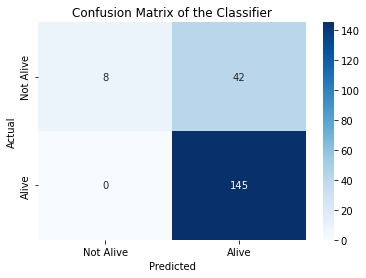

In [162]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Not Alive', 'Alive'])

In [163]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.58


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Classification Trees (CART Models)</h3><br>



In [164]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [165]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9817
Full Tree Testing ACCURACY : 0.8359
Full Tree AUC Score: 0.811


In [166]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 20
True Positives : 125



In [167]:
# INSTANTIATING a classification tree object

pruned_tree = DecisionTreeClassifier(max_depth = 8,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
pruned_tree_fit = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8504
Testing  ACCURACY: 0.8974
AUC Score        : 0.8262


<h3> Confusion Matrix of the pruned tree </h3>

In [168]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 4
True Positives : 141



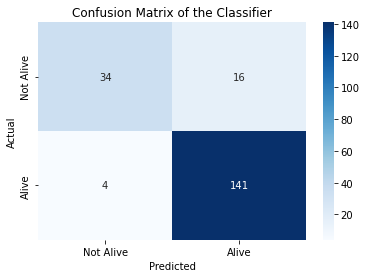

In [169]:
# Visualizing the decision matrix of the pruned decision tree

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = pruned_tree_pred,
          labels = ['Not Alive', 'Alive'])

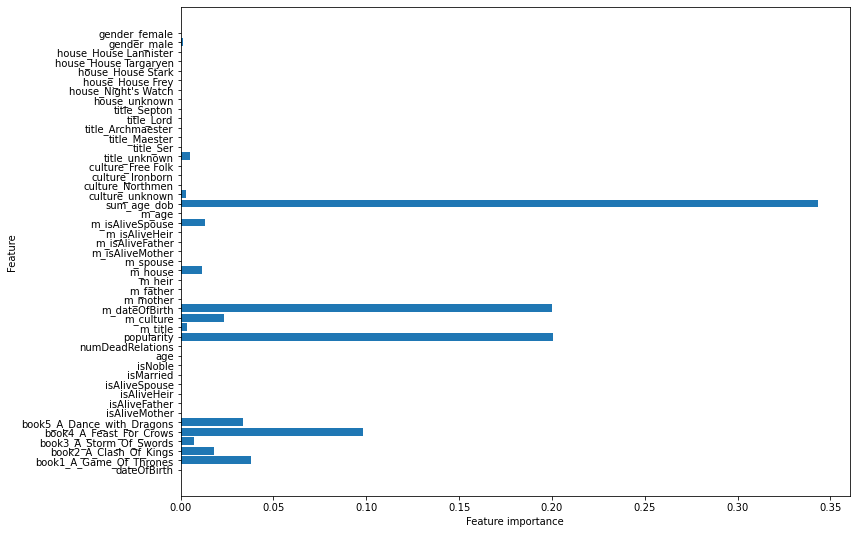

In [170]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

<h3>Comparing Results</h3>

In [171]:
# comparing results
print(f"""
Model                               AUC Score       TN, FP, FN, TP
-----                              ---------        --------------
Logistic                                {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree                               {full_tree_auc_score}      {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree(Final Model choice)         {pruned_tree_auc_score}     {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model                               AUC Score       TN, FP, FN, TP
-----                              ---------        --------------
Logistic                                0.58         (8, 42, 0, 145)
Full Tree                               0.811      (38, 12, 20, 125)
Pruned Tree(Final Model choice)         0.8262     (34, 16, 4, 141)

